Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [1]:
library(tidymodels)
library(readr)
library(moderndive)

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ recipes      1.3.0
✔ dials        1.4.0     ✔ rsample      1.3.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.8     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()


Attaching package: ‘readr’


The following object is masked from ‘package:yardstick’:

    spec


The following objec

We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [2]:
hate_crimes <- read_csv("http://bit.ly/2ItxYg3")

Rows: 51 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): state, median_house_inc, trump_support, unemployment, urbanization
dbl (4): share_pop_metro, hs, hate_crimes, income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_parallel_slopes()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


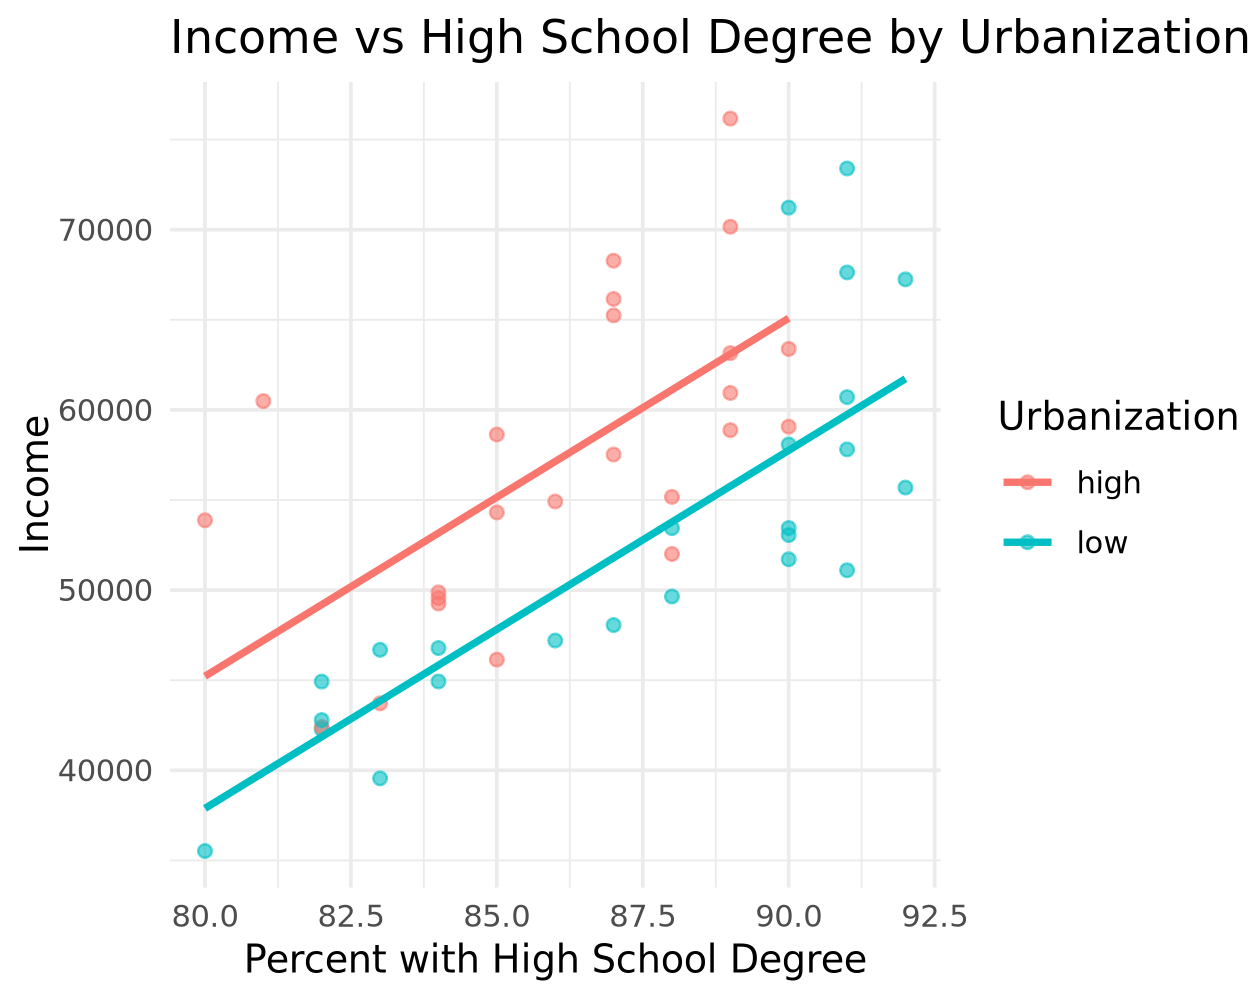

In [3]:
library(ggplot2)
library(moderndive)

ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) +
  geom_point(alpha = 0.6) +
  geom_parallel_slopes(se = FALSE) +
  labs(
    x = "Percent with High School Degree",
    y = "Income",
    title = "Income vs High School Degree by Urbanization Level",
    color = "Urbanization"
  ) +
  theme_minimal()

❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**

In the plot, the regression line for "high" urbanization appears to be higher than the line for "low" urbanization when the percent of adults aged 25 or older with at least a high school degree is at its lower values. This means the "high" urbanization group has the larger intercept.



Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code your scatter plot in the cell below.**

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


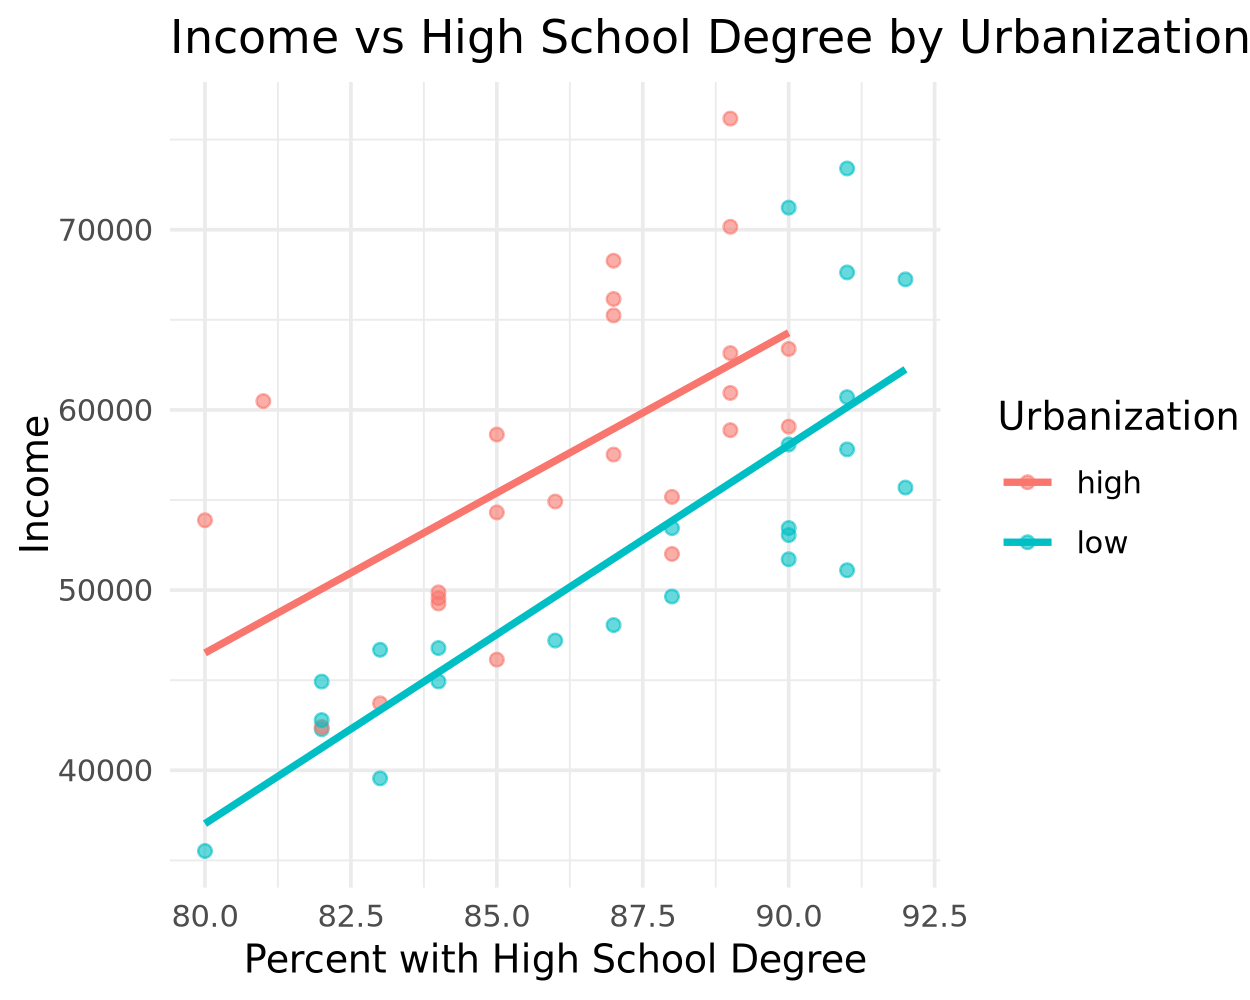

In [4]:
ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    x = "Percent with High School Degree",
    y = "Income",
    title = "Income vs High School Degree by Urbanization (Separate Slopes)",
    color = "Urbanization"
  ) +
  theme_minimal()

❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

When comparing the two plots, the lines for "low" and "high" urbanization have the same slope but different intercepts in the parallel slopes model. In the separate slopes model using geom_smooth(), the slopes appear to be visibly different between urbanization levels.

Ultimately, it would be better to run a more complex interaction model that estimates a separate slope for each level of urbanization.

Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [6]:
# Load required libraries
library(tidymodels)

# Create recipe: no interaction (parallel slopes)
ps_rec <- recipe(income ~ hs + urbanization, data = hate_crimes) |> 
  step_naomit(all_predictors(), all_outcomes()) |> 
  step_dummy(urbanization) |> 
  prep()

# Define model
mod <- linear_reg() |> 
  set_engine("lm")

# Fit model
ps_mod <- mod |> 
  fit(income ~ ., data = juice(ps_rec))

# View model summary
ps_mod


parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
     (Intercept)                hs  urbanization_low  
         -113725              1987             -7333  


In [7]:
# non-parallel slopes model

# Create recipe: with interaction (non-parallel slopes)
nps_rec <- recipe(income ~ hs + urbanization, data = hate_crimes) |> 
  step_naomit(all_predictors(), all_outcomes()) |> 
  step_dummy(urbanization) |> 
  step_interact(~ starts_with("urbanization"):hs) |> 
  prep()

# Fit model
nps_mod <- mod |> 
  fit(income ~ ., data = juice(nps_rec))

# View model summary
nps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
          (Intercept)                     hs       urbanization_low  
               -95647                   1777                 -35394  
urbanization_low_x_hs  
                  324  


The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [8]:
# Create a combined predictions table for both models
model_preds <- rbind(
  augment(ps_mod, juice(ps_rec)) |> 
    select(income, .pred, .resid) |> 
    mutate(model = "parallel_slopes"),
  
  augment(nps_mod, juice(nps_rec)) |> 
    select(income, .pred, .resid) |> 
    mutate(model = "interaction")
)

# Group by model and compute R-squared manually
model_preds |> 
  group_by(model) |> 
  summarize(r_squared = var(.pred) / var(income))

model,r_squared
<chr>,<dbl>
interaction,0.5746731
parallel_slopes,0.5716112


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [9]:
glance(ps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5716112,0.5525717,6325.667,30.02238,5.204241e-09,2,-486.6739,981.3479,988.8327,1800633086,45,48


❓Compare the adjusted proportion of variance accounted for in each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**

When comparing the adjusted proportion of variance explained (R²) by the two models, the non-parallel slopes model (interaction model) typically explains more variance than the parallel slopes model because it allows the effect of high school education (hs) on income to vary by urbanization level. The parallel slopes model assumes the same effect of hs across urbanization groups, which may oversimplify the relationship.

Therefore, I prefer the non-parallel slopes (interaction) model because it fits the data better by capturing differences in how education relates to income across different urbanization levels. This usually leads to a higher R², indicating better explanatory power and more accurate predictions.

❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**

In [10]:
tidy(nps_mod)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-95647.4274,39937.8800,-2.3949050,0.0209485906
hs,1776.9938,463.2497,3.8359312,0.0003953977
urbanization_low,-35393.9651,49893.5228,-0.7093900,0.4818248864
urbanization_low_x_hs,323.9987,575.6838,0.5628067,0.5764231616


Based on this model, Income is lower in low urbanization states by about $35,394 when the high school graduation rate is zero.

For high urbanization states, every 1% increase in the high school graduation rate is associated with an increase of about $1,777 in income.

For low urbanization states, the effect of high school graduation on income is about $1,777 + $324 = $2,101 per 1% increase, slightly higher but not statistically significant (p = 0.576).

Therefore, high urbanization states have a higher baseline income, but the rate at which income increases with education is somewhat similar across urbanization levels.

❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**

For high urbanization states (the baseline group), income increases by about $1,777 per 1% increase in hs.

For low urbanization states, the increase is about $1,777 + $324 = $2,101 per 1% increase in hs

